### Import neccessary packages

In [336]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb
sb.set_theme(style="white", palette=None)
pd.set_option("display.max_columns", None) #Show all columns, or else some will just be "..."

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall

### Read Files

In [337]:
train_df = pd.read_csv("./datasets/train.csv")
train_df_oversampled = pd.read_csv("./datasets/train_oversampled.csv")
train_df_smoten = pd.read_csv("./datasets/train_smoten.csv")
test_df = pd.read_csv("./datasets/test.csv")

Before we continue, we split the test data into X_test and y_test

In [338]:
X_test = pd.DataFrame(test_df.loc[:, test_df.columns!= "INSTALLS_GROUP"])
y_test = pd.DataFrame(test_df.loc[:, "INSTALLS_GROUP"])

### Machine learning

**Function for model evaluation**

In [339]:
def evaluate_model(y_train,y_train_pred, y_test, y_test_pred):
    # Print the Classification Report
    print("Train Data")
    print(classification_report(y_train,y_train_pred))
    print()

    print("Train Data")
    print(classification_report(y_test,y_test_pred))

    # Plot the three-way Confusion Matrix
    f, axes = plt.subplots(1, 2, figsize=(18, 6))
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

**Creating a Model for INSTALLS_GROUP: Attempt 1 (Decision Tree Using Imbalanced data)**

Since our data are mostly categorical variables, we chose Decision Tree as our model.

Our predictors for `INSTALLS_GROUP`: `CONTENT_RATING`, `CATEGORY`, `SIZEBAND`, `PRICEBAND`, `FREE`, `AD_SUPPORTED`, `IN_APP_PURCHASES`, `EDITORS_CHOICE`

In [340]:
# Extract train data
X_train = pd.DataFrame(train_df.loc[:, train_df.columns!= "INSTALLS_GROUP"])
y_train = pd.DataFrame(train_df.loc[:, "INSTALLS_GROUP"])

#Fit the model
decision_tree_original = DecisionTreeClassifier()
decision_tree_original.fit(X_train, y_train)

DecisionTreeClassifier()

Check the accuracy of the model

Train Data
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      3527
           1       0.72      0.85      0.78      6342
           2       0.73      0.42      0.53      2363

    accuracy                           0.75     12232
   macro avg       0.75      0.68      0.70     12232
weighted avg       0.75      0.75      0.74     12232


Train Data
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1496
           1       0.63      0.74      0.68      2702
           2       0.50      0.28      0.36      1045

    accuracy                           0.64      5243
   macro avg       0.61      0.57      0.58      5243
weighted avg       0.62      0.64      0.62      5243



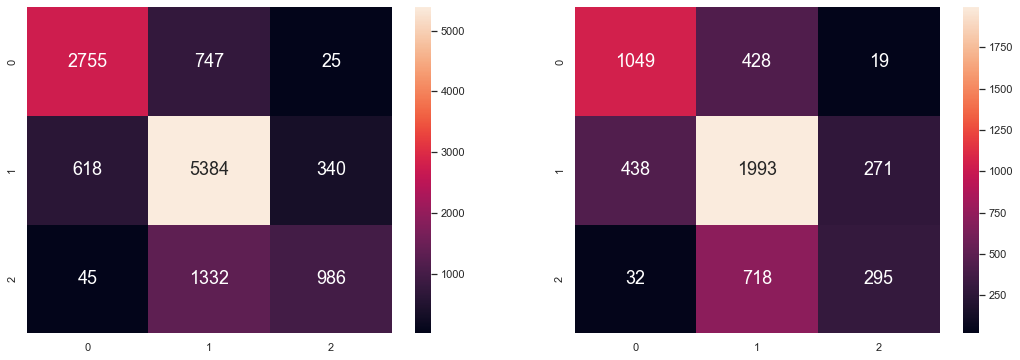

In [341]:
# Predict test data using the model created
y_train_pred = decision_tree_original.predict(X_train)
y_test_pred = decision_tree_original.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_test_pred)

**Creating a Model for RATING_GROUP: Attempt 2 (Decision Tree Using Oversampled (Randomly Sampled) data)**


In [329]:
# Extract train data
X_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, train_df_oversampled.columns!= "INSTALLS_GROUP"])
y_train_oversampled = pd.DataFrame(train_df_oversampled.loc[:, "INSTALLS_GROUP"])

#Fit the model
decision_tree_over = DecisionTreeClassifier()
decision_tree_over.fit(X_train_oversampled, y_train_oversampled)

DecisionTreeClassifier()

Train Data
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6342
           1       0.70      0.57      0.63      6342
           2       0.73      0.84      0.78      6342

    accuracy                           0.76     19026
   macro avg       0.75      0.76      0.75     19026
weighted avg       0.75      0.76      0.75     19026


Train Data
              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1496
           1       0.67      0.46      0.55      2702
           2       0.42      0.65      0.51      1045

    accuracy                           0.59      5243
   macro avg       0.58      0.62      0.59      5243
weighted avg       0.61      0.59      0.58      5243



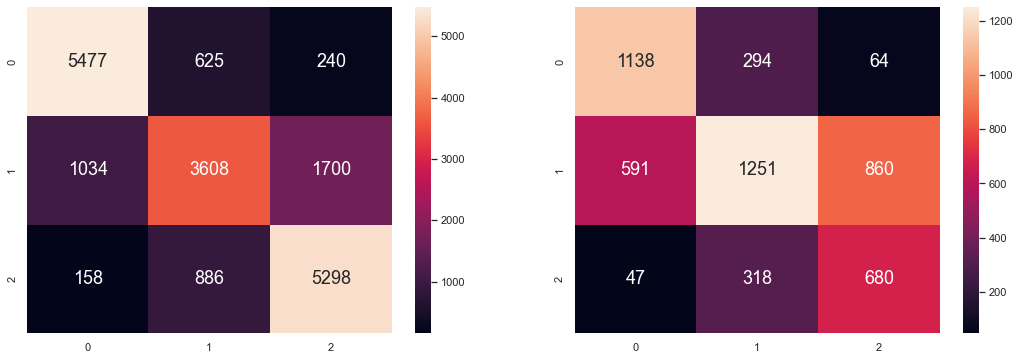

In [330]:
# Predict test data using the model created
y_train_oversampled_pred = decision_tree_over.predict(X_train_oversampled)
y_test_pred = decision_tree_over.predict(X_test)

evaluate_model(y_train_oversampled, y_train_oversampled_pred, y_test, y_test_pred)

**Creating a Model for RATING_GROUP: Attempt 3 (Decision Tree Using Oversampled (SMOTEN) data)**

In [320]:
# Extract train data
X_train_smoten = pd.DataFrame(train_df_smoten.loc[:, train_df_smoten.columns!= "INSTALLS_GROUP"])
y_train_smoten = pd.DataFrame(train_df_smoten.loc[:, "INSTALLS_GROUP"])

#Fit the model
decision_tree_smoten = DecisionTreeClassifier()
decision_tree_smoten.fit(X_train_smoten, y_train_smoten)

DecisionTreeClassifier()

Train Data
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      6342
           1       0.71      0.57      0.63      6342
           2       0.73      0.84      0.78      6342

    accuracy                           0.76     19026
   macro avg       0.76      0.76      0.75     19026
weighted avg       0.76      0.76      0.75     19026


Train Data
              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1496
           1       0.67      0.49      0.56      2702
           2       0.43      0.63      0.51      1045

    accuracy                           0.59      5243
   macro avg       0.58      0.62      0.59      5243
weighted avg       0.61      0.59      0.59      5243



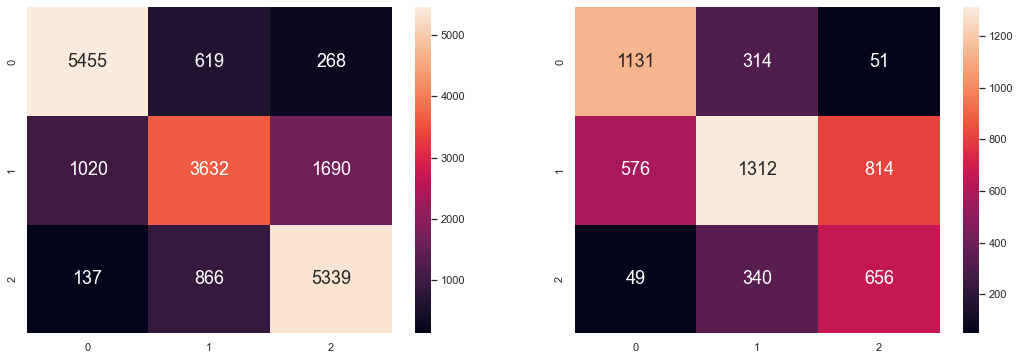

In [321]:
# Predict test data using the model created
y_train_smoten_pred = decision_tree_smoten.predict(X_train_smoten)
y_test_pred = decision_tree_smoten.predict(X_test)

evaluate_model(y_train_smoten, y_train_smoten_pred, y_test, y_test_pred)

Let's try to use more decision trees for this case

Train Data
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      3527
           1       0.71      0.84      0.77      6342
           2       0.67      0.46      0.54      2363

    accuracy                           0.74     12232
   macro avg       0.74      0.68      0.70     12232
weighted avg       0.74      0.74      0.73     12232


Train Data
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1496
           1       0.64      0.75      0.69      2702
           2       0.49      0.31      0.38      1045

    accuracy                           0.65      5243
   macro avg       0.62      0.58      0.59      5243
weighted avg       0.64      0.65      0.63      5243



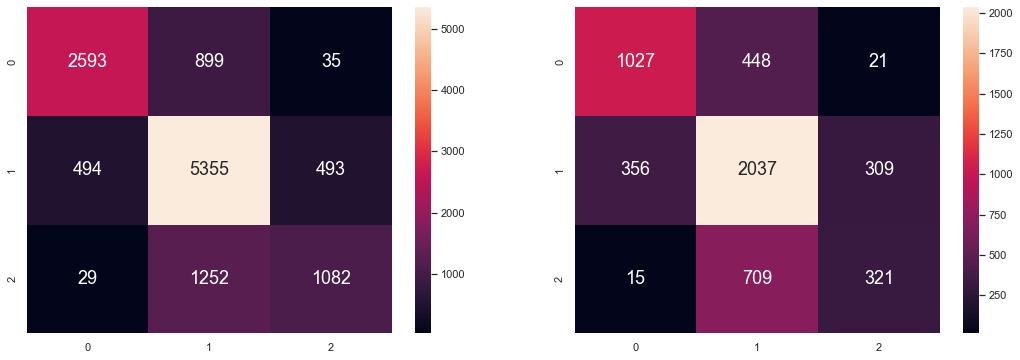

In [322]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)

# Predict test data using the model created
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_test_pred)

Train Data
              precision    recall  f1-score   support

           0       0.79      0.60      0.68      3527
           1       0.63      0.87      0.73      6342
           2       0.60      0.19      0.29      2363

    accuracy                           0.66     12232
   macro avg       0.67      0.55      0.57     12232
weighted avg       0.67      0.66      0.63     12232


Train Data
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1496
           1       0.63      0.86      0.73      2702
           2       0.60      0.18      0.28      1045

    accuracy                           0.66      5243
   macro avg       0.67      0.56      0.57      5243
weighted avg       0.67      0.66      0.63      5243



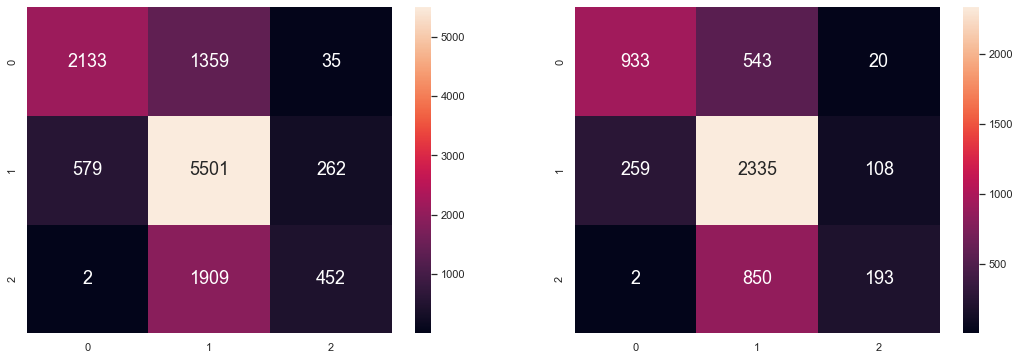

In [301]:
svc = SVC()
svc.fit(X_train, y_train)

# Predict test data using the model created
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_test_pred)

In [21]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Train Data
              precision    recall  f1-score   support

           0       0.79      0.55      0.65      3527
           1       0.76      0.94      0.84      7950
           2       0.00      0.00      0.00       755

    accuracy                           0.77     12232
   macro avg       0.52      0.50      0.50     12232
weighted avg       0.72      0.77      0.73     12232


Train Data
              precision    recall  f1-score   support

           0       0.79      0.58      0.67      1496
           1       0.78      0.93      0.85      3464
           2       0.00      0.00      0.00       283

    accuracy                           0.78      5243
   macro avg       0.52      0.50      0.51      5243
weighted avg       0.74      0.78      0.75      5243



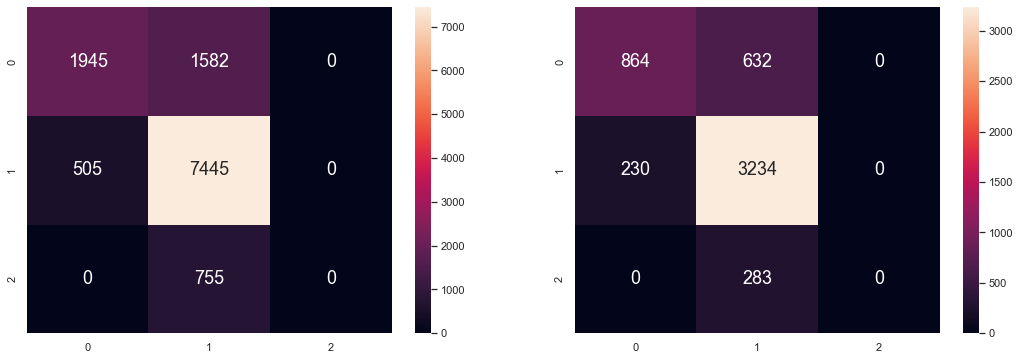

In [170]:
# Logistic Regression
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4)
random_forest.fit(X_train, y_train)

# Predict test data using the model created
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_test_pred)

In [171]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [186]:
param_grid = { 
    'n_estimators': np.arange(200, 1000, 100),
    'max_features': ['auto', 'sqrt'],
    'max_depth' : np.arange(8, 11),
}
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose=5)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.630 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.639 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.634 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.639 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.652 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.631 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.638 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.634 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=8, max_fea

KeyboardInterrupt: 

In [117]:
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=500)

In [87]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START C=1, gamma=1, kernel=linear................................
[CV 1/5; 1/32] END .C=1, gamma=1, kernel=linear;, score=0.764 total time=   1.1s
[CV 2/5; 1/32] START C=1, gamma=1, kernel=linear................................
[CV 2/5; 1/32] END .C=1, gamma=1, kernel=linear;, score=0.766 total time=   1.1s
[CV 3/5; 1/32] START C=1, gamma=1, kernel=linear................................
[CV 3/5; 1/32] END .C=1, gamma=1, kernel=linear;, score=0.761 total time=   1.1s
[CV 4/5; 1/32] START C=1, gamma=1, kernel=linear................................
[CV 4/5; 1/32] END .C=1, gamma=1, kernel=linear;, score=0.777 total time=   1.1s
[CV 5/5; 1/32] START C=1, gamma=1, kernel=linear................................
[CV 5/5; 1/32] END .C=1, gamma=1, kernel=linear;, score=0.773 total time=   1.2s
[CV 1/5; 2/32] START C=1, gamma=1, kernel=rbf...................................
[CV 1/5; 2/32] END ....C=1, gamma=1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=10)

In [116]:
grid.best_score_

0.7682744051376389

Train Data
              precision    recall  f1-score   support

           0       0.80      0.55      0.65      3779
           1       0.76      0.94      0.84      8525
           2       0.74      0.04      0.07       802

    accuracy                           0.77     13106
   macro avg       0.77      0.51      0.52     13106
weighted avg       0.77      0.77      0.74     13106


Train Data
              precision    recall  f1-score   support

           0       0.80      0.58      0.67      1244
           1       0.78      0.94      0.85      2889
           2       0.54      0.03      0.06       236

    accuracy                           0.78      4369
   macro avg       0.71      0.51      0.53      4369
weighted avg       0.77      0.78      0.76      4369



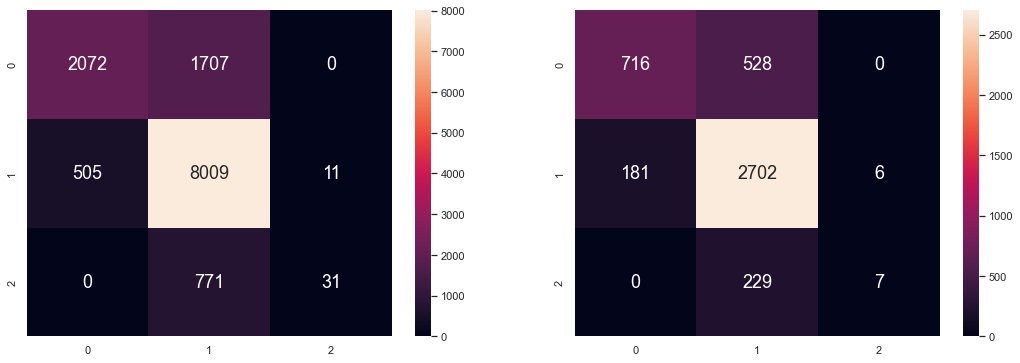

In [90]:
y_test_pred = grid.predict(X_test)
y_train_pred = grid.predict(X_train)

evaluate_model(y_train, y_train_pred, y_test, y_test_pred)

max_depth = np.arange(10,20)

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth=12), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

In [21]:
from sklearn.ensemble import RandomForestClassifier

#fit
model_rf = RandomForestClassifier(criterion='entropy')
model_rf.fit(X_train, y_train)

#predict y
y_pred_test_rf = model_rf.predict(X_test)

#score
print(confusion_matrix(y_test, y_pred_test_rf))

[[   0  124    4]
 [   2 1650   65]
 [   1  477   46]]


In [22]:
# Fetch the best Model or the best set of Hyper-parameters
print(CV_rfc.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(CV_rfc.best_score_))

RandomForestClassifier(max_depth=4, random_state=42)
0.7091600673442664


Train Data
              precision    recall  f1-score   support

           0       0.60      0.04      0.07       395
           1       0.73      0.98      0.83      5040
           2       0.61      0.10      0.18      1672

    accuracy                           0.72      7107
   macro avg       0.65      0.37      0.36      7107
weighted avg       0.69      0.72      0.64      7107


Train Data
              precision    recall  f1-score   support

           0       0.07      0.01      0.01       128
           1       0.73      0.96      0.83      1717
           2       0.41      0.08      0.13       524

    accuracy                           0.72      2369
   macro avg       0.41      0.35      0.33      2369
weighted avg       0.63      0.72      0.63      2369



<AxesSubplot:>

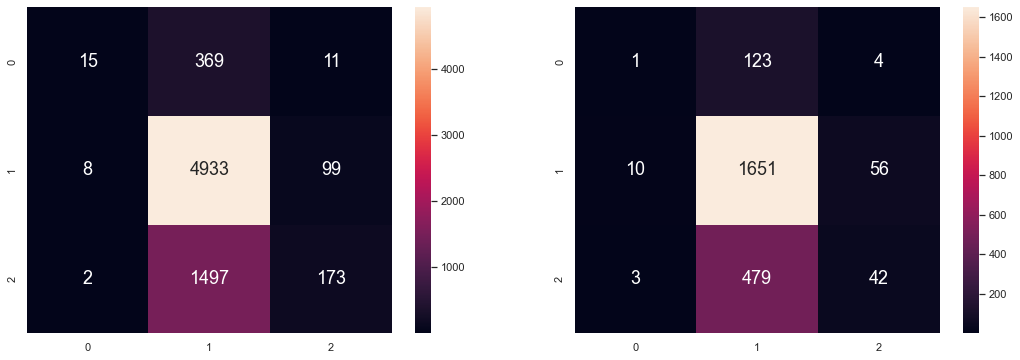

In [23]:
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Print the Classification Report
print("Train Data")
print(classification_report(y_train,y_train_pred))
print()

print("Train Data")
print(classification_report(y_test,y_test_pred))

# Plot the three-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(18, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

In [24]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

72.06

In [25]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.07      0.01      0.01       128
           1       0.73      0.96      0.83      1717
           2       0.41      0.08      0.13       524

    accuracy                           0.72      2369
   macro avg       0.41      0.35      0.33      2369
weighted avg       0.63      0.72      0.63      2369

[[   1  123    4]
 [  10 1651   56]
 [   3  479   42]]


### Predict `INSTALLS_GROUP`

In [26]:
# Extract Response and Predictors
response = "INSTALLS_GROUP"
y = pd.DataFrame(model_df_encoded[response])
X = pd.DataFrame(model_df_encoded.drop(response, axis = 1))
X.drop(["RATING_GROUP"], inplace = True, axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=99)

#Fit the model
decision_tree = DecisionTreeClassifier() #set max-depth to default
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Train Data
              precision    recall  f1-score   support

           0       0.77      0.49      0.59       723
           1       0.83      0.98      0.90      5616
           2       0.74      0.04      0.08       768

    accuracy                           0.83      7107
   macro avg       0.78      0.50      0.52      7107
weighted avg       0.82      0.83      0.78      7107


Train Data
              precision    recall  f1-score   support

           0       0.72      0.47      0.57       248
           1       0.82      0.97      0.89      1852
           2       0.57      0.04      0.08       269

    accuracy                           0.81      2369
   macro avg       0.70      0.49      0.51      2369
weighted avg       0.78      0.81      0.76      2369



<AxesSubplot:>

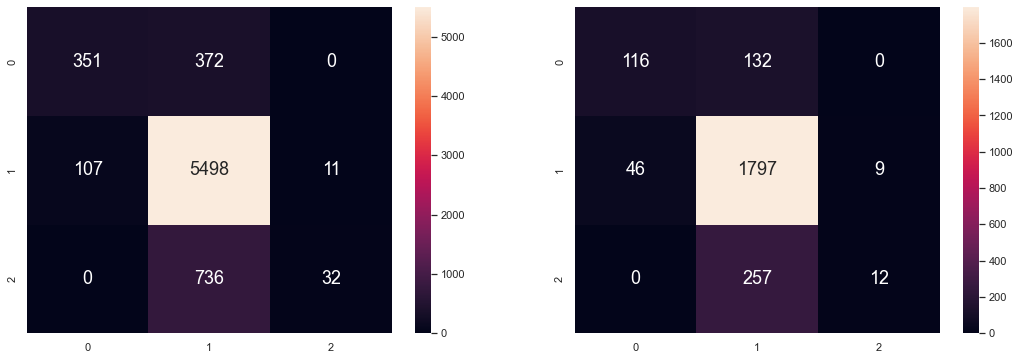

In [27]:
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Print the Classification Report
print("Train Data")
print(classification_report(y_train,y_train_pred))
print()

print("Train Data")
print(classification_report(y_test,y_test_pred))

# Plot the three-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(18, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

In [28]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [29]:
rfc= RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [1, 100, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10,12,14,16],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100, 500, 1000]})

In [30]:
# Fetch the best Model or the best set of Hyper-parameters
print(CV_rfc.best_params_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(CV_rfc.best_score_))

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
0.8228501352527043


Train Data
              precision    recall  f1-score   support

           0       0.76      0.49      0.59       723
           1       0.83      0.98      0.90      5616
           2       0.73      0.04      0.08       768

    accuracy                           0.83      7107
   macro avg       0.78      0.50      0.53      7107
weighted avg       0.81      0.83      0.78      7107


Train Data
              precision    recall  f1-score   support

           0       0.73      0.48      0.58       248
           1       0.82      0.97      0.89      1852
           2       0.57      0.04      0.08       269

    accuracy                           0.81      2369
   macro avg       0.71      0.50      0.52      2369
weighted avg       0.78      0.81      0.77      2369



<AxesSubplot:>

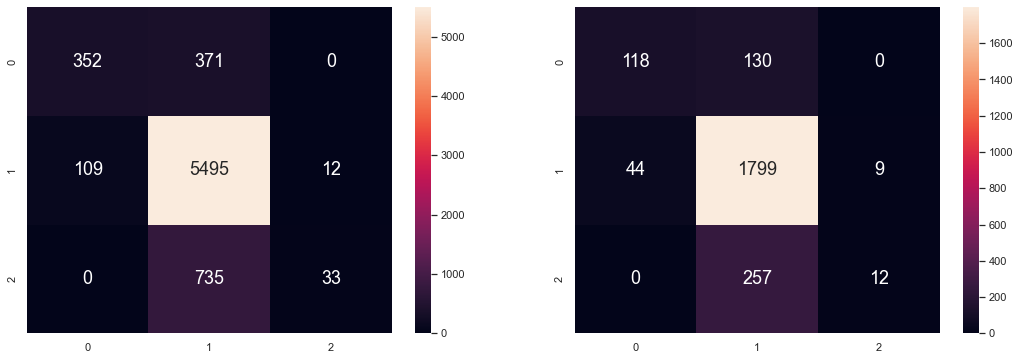

In [31]:
#Fit the model
rfc_best = RandomForestClassifier(criterion="gini", max_depth=8, max_features="auto", n_estimators=100) 
rfc_best.fit(X_train, y_train)

y_train_pred = rfc_best.predict(X_train)
y_test_pred = rfc_best.predict(X_test)

# Print the Classification Report
print("Train Data")
print(classification_report(y_train,y_train_pred))
print()

print("Train Data")
print(classification_report(y_test,y_test_pred))

# Plot the three-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(18, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])